#Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Vizualizando os dados

In [2]:
notas=pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas.nota.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [5]:
notas.nota.value_counts()


,count
nota,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


#Análise exploratória


<Axes: ylabel='nota'>

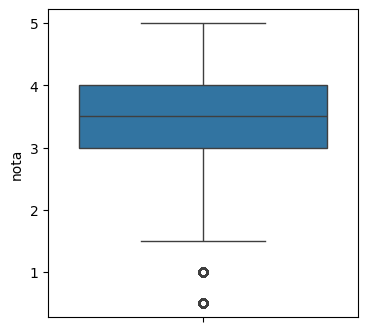

In [6]:
plt.figure(figsize=(4, 4))
sns.boxplot(notas.nota)

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64


<Axes: ylabel='nota'>

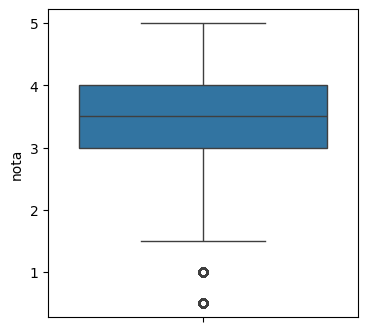

In [7]:
print(notas.nota.describe())
plt.figure(figsize=(4, 4))
sns.boxplot(notas.nota)


In [8]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ['filmeId', "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
print(notas.query("filmeId==1").nota.mean())
print(notas.query('filmeId==2').nota.mean())

3.9209302325581397
3.4318181818181817


In [11]:
medias_por_filme = notas.groupby("filmeId").mean()['nota']
medias_por_filme.head()

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


<Axes: ylabel='Frequency'>

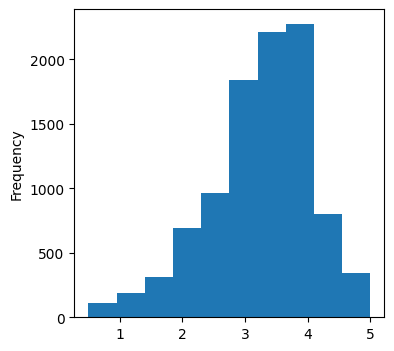

In [12]:
plt.figure(figsize=(4, 4))
medias_por_filme.plot(kind='hist')

<Axes: ylabel='nota'>

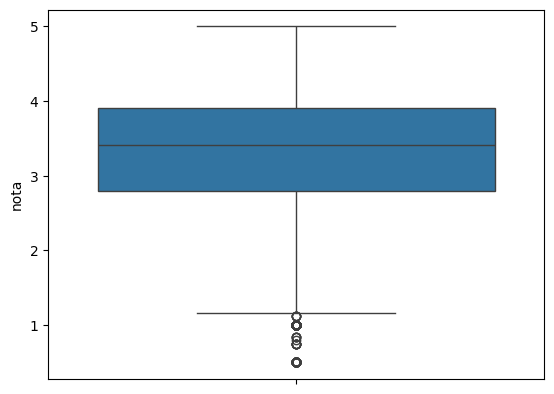

In [13]:
sns.boxplot(medias_por_filme)

In [14]:
medias_por_filme.describe()

,nota
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000


<ipython-input-15-0966dcebe715>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme, bins=10)


<Axes: xlabel='nota', ylabel='Density'>

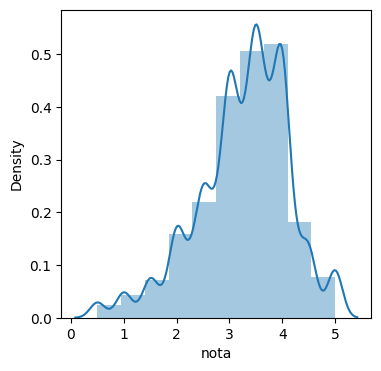

In [15]:
plt.figure(figsize=(4, 4))
sns.distplot(medias_por_filme, bins=10)

Text(0.5, 1.0, 'Medias dos Filmes')

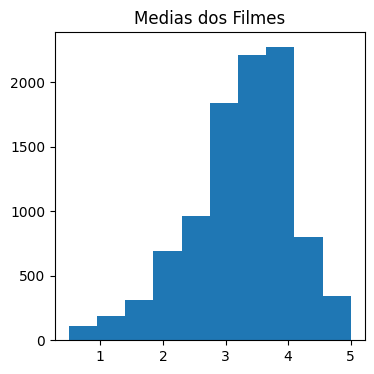

In [16]:
plt.figure(figsize=(4, 4))
plt.hist(medias_por_filme)
plt.title("Medias dos Filmes")

#Varáveis

In [17]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [18]:
print(tmdb['original_language'].value_counts().index,'\n')
tmdb['original_language'].value_counts().values

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language') 



array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [19]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.head()

,original_language,count
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


In [20]:
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


#Data Visualization

In [31]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


<Axes: xlabel='lingua', ylabel='total'>

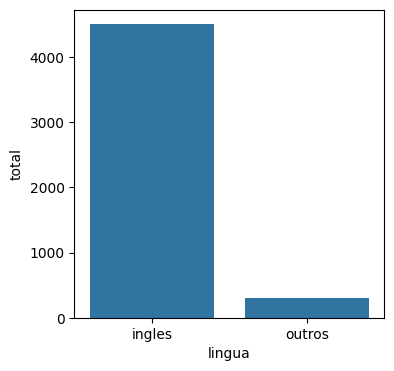

In [32]:
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]
    }
pd.DataFrame(dados)
plt.figure(figsize=(4, 4))
sns.barplot(x='lingua',y='total',data=dados)


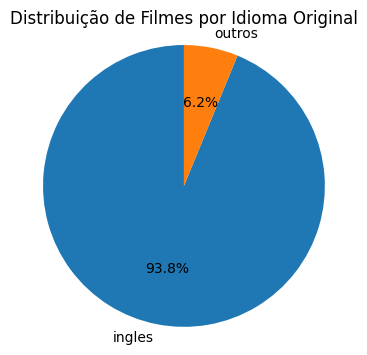

In [33]:

# Create the pie chart
plt.figure(figsize=(4, 4))  # Adjust figure size as needed
plt.pie(dados['total'], labels=dados['lingua'], autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Filmes por Idioma Original')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [34]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

,count
original_language,
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ko,11


<ipython-input-35-2573fc5c2dd6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='original_language', kind='count',


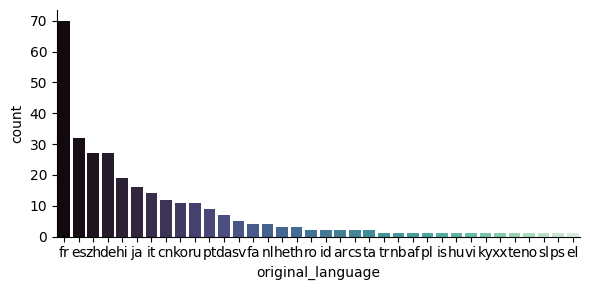

In [35]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x='original_language', kind='count',
            data=filmes_sem_lingua_original_em_ingles,
            aspect =2,
            palette='mako',
            height=3, order = total_por_lingua_de_outros_filmes.index)

#Dados e estatística

In [36]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [37]:
notas_do_toy_story = notas.query('filmeId==1')
notas_do_jumanji = notas.query('filmeId==2')
print("TS:", len(notas_do_toy_story), "Jum:", len(notas_do_jumanji))

TS: 215 Jum: 110


In [38]:
print("Media TS: ", notas_do_toy_story.nota.mean())
print("Media Jum: ", notas_do_jumanji.nota.mean())


Media TS:  3.9209302325581397
Media Jum:  3.4318181818181817


In [39]:
print("Mediana TS:", notas_do_toy_story.nota.median() ,"Mediana Jum: ", notas_do_jumanji.nota.median())

Mediana TS: 4.0 Mediana Jum:  3.5
